In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Notes on the data below:

Cancelled_Diverted_2023.csv shows caancelled or diverted flight data with arrival and departure airports and boolean columns for different reasons of flight delay e.g weather etc in the USA for year 2023.

It also details the distance flown and the date of the flight as well as airline and tail number

84% of flights were cancelled  and Southwest airlines was the biggest culprit airline

No null records

No duplicates from what I can see as the records are delays of different aircraft with different tail numbers





In [3]:
cancelled_flights = pd.read_csv('Cancelled_Diverted_2023.csv')

#cancelled_flights.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Cancelled_Diverted_2023.csv'

In [ ]:
cancelled_flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104488 entries, 0 to 104487
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   FlightDate          104488 non-null  object 
 1   Day_Of_Week         104488 non-null  int64  
 2   Airline             104488 non-null  object 
 3   Tail_Number         104488 non-null  object 
 4   Cancelled           104488 non-null  float64
 5   Diverted            104488 non-null  float64
 6   Dep_Airport         104488 non-null  object 
 7   Dep_CityName        104488 non-null  object 
 8   DepTime_label       104488 non-null  object 
 9   Dep_Delay           104488 non-null  float64
 10  Dep_Delay_Tag       104488 non-null  int64  
 11  Dep_Delay_Type      104488 non-null  object 
 12  Arr_Airport         104488 non-null  object 
 13  Arr_CityName        104488 non-null  object 
 14  Arr_Delay           104488 non-null  float64
 15  Arr_Delay_Type      104488 non-nul

In [ ]:
cancelled_flights.describe(include='all')

##84% of flights were cancelled  and Southwest airlines was the biggest culprit airline

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
count,104488,104488.000000,104488,104488,104488.000000,104488.000000,104488,104488,104488,104488.000000,...,104488,104488.0,104488,104488.0,104488,104488.0,104488.0,104488.0,104488.0,104488.0
unique,365,NaN,15,5438,NaN,NaN,345,339,4,NaN,...,340,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN
top,2023-02-01,NaN,Southwest Airlines Co.,0,NaN,NaN,DFW,"New York, NY",Afternoon,NaN,...,"New York, NY",NaN,No Arrival Delay,NaN,Short Haul,NaN,NaN,NaN,NaN,NaN
freq,2147,NaN,17227,15486,NaN,NaN,5223,8352,37942,NaN,...,8621,NaN,104488,NaN,92276,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.967374,NaN,NaN,0.841589,0.158411,NaN,NaN,NaN,7.798848,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
std,NaN,2.021840,NaN,NaN,0.365127,0.365127,NaN,NaN,NaN,49.621610,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,-31.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
25%,NaN,2.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
50%,NaN,4.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
75%,NaN,6.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
cancelled_flights.isnull().sum()

FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Cancelled             0
Diverted              0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
dtype: int64

In [ ]:
cancelled_flights[cancelled_flights.duplicated()]


,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
132,2023-01-22,7,Endeavor Air,N8877A,1.0,0.0,MGM,"Montgomery, AL",Morning,0.0,...,"Atlanta, GA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
140,2023-01-23,1,Endeavor Air,N133EV,1.0,0.0,BGR,"Bangor, ME",Afternoon,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
193,2023-01-23,1,Endeavor Air,N901XJ,1.0,0.0,LGA,"New York, NY",Afternoon,0.0,...,"Bangor, ME",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1502,2023-01-09,1,American Airlines Inc.,N680AW,1.0,0.0,BUR,"Burbank, CA",Afternoon,0.0,...,"Phoenix, AZ",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3495,2023-01-17,2,Frontier Airlines Inc.,0,1.0,0.0,DEN,"Denver, CO",Evening,0.0,...,"Las Vegas, NV",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103512,2023-12-14,4,Southwest Airlines Co.,N8870K,1.0,0.0,HDN,"Hayden, CO",Afternoon,0.0,...,"Denver, CO",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
103885,2023-12-26,2,Endeavor Air,N324PQ,1.0,0.0,GFK,"Grand Forks, ND",Afternoon,0.0,...,"Minneapolis, MN",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
103915,2023-12-18,1,Endeavor Air,N491PX,1.0,0.0,RDU,"Raleigh/Durham, NC",Morning,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
104379,2023-12-18,1,JetBlue Airways,N323JB,1.0,0.0,LGA,"New York, NY",Afternoon,0.0,...,"Boston, MA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


In [ ]:
#pd.read_csv('Dataset_A_US2023_Kaggle')

In [ ]:
import requests

###Getting weather data for melbourne aiport from the open weather api for current weather

lat= -37.663712

lon= 144.844788

api_key=''



#example url to call: https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}



url = "https://api.openweathermap.org/data/2.5/weather?"



params = {'lat': str(lat), 'lon':str(lon), "appid":api_key}



response = requests.get(url, params=params)



json_response = response.json()



json_response

Flight Ontime Reporting With Weather

This is a nice dataset that already combines weather with flight data but it is split by airport, a csv for each, details cancellations airports, time of departure and weather variables like temp, air pressure, visibility, wind speed, wind gust, precipitation, ice report


In [4]:
sfo_df = pd.read_csv('../raw_data/Dataset_B_FORWW_Kaggle/SFO.csv')

In [5]:
sfo_df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,47.16,1023.71,1023.5,16093.40,4.60,30.38,0.0,0.0
1,2021-01-03 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.10,1022.01,1021.8,9656.04,4.60,30.38,0.0,0.0
2,2021-01-04 21:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.10,1023.71,1023.8,16093.40,6.90,30.38,0.0,0.0
3,2021-01-05 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,47.16,1023.71,1023.7,16093.40,4.60,30.38,0.0,0.0
4,2021-01-06 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,48.01,1024.72,1024.5,16093.40,3.45,30.38,0.0,0.0


In [6]:
sfo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398942 entries, 0 to 398941
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    398942 non-null  object 
 1   Origin                  398942 non-null  object 
 2   Dest                    398942 non-null  object 
 3   Carrier                 398942 non-null  object 
 4   Cancelled               398942 non-null  bool   
 5   CancellationReason      5304 non-null    object 
 6   Delayed                 398942 non-null  bool   
 7   DepDelayMinutes         393795 non-null  float64
 8   CarrierDelay            67858 non-null   float64
 9   WeatherDelay            67858 non-null   float64
 10  NASDelay                67858 non-null   float64
 11  SecurityDelay           67858 non-null   float64
 12  LateAircraftDelay       67858 non-null   float64
 13  Temperature             398942 non-null  float64
 14  Feels_Like_Temperatu

In [7]:
sfo_df.describe(include='all')

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,398942,398942,398942,398942,398942,5304,398942,393795.000000,67858.000000,67858.000000,...,67858.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.0
unique,22589,1,86,10,2,4,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-08-18 23:00:00,SFO,LAX,United Air Lines Inc.,False,Carrier,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,340,398942,35681,131701,393638,2961,259925,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.834569,26.825400,2.108550,...,26.344248,59.425419,59.200286,1016.629461,1016.654582,15221.800013,10.892898,30.358620,0.070532,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.223505,73.159454,26.785654,...,61.277070,7.331436,7.733875,5.004995,4.724856,2760.457598,7.382208,2.773577,0.497692,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,36.000000,31.750000,985.440000,985.300000,96.560000,0.000000,16.110000,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,54.000000,54.000000,1013.210000,1013.700000,16093.400000,4.600000,30.380000,0.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.000000,0.000000,...,0.000000,59.000000,59.000000,1016.260000,1016.600000,16093.400000,10.360000,30.380000,0.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,26.000000,0.000000,...,31.000000,64.000000,64.000000,1019.640000,1019.300000,16093.400000,16.110000,30.380000,0.000000,0.0


In [8]:
sfo_df.isnull().sum()

Time                           0
Origin                         0
Dest                           0
Carrier                        0
Cancelled                      0
CancellationReason        393638
Delayed                        0
DepDelayMinutes             5147
CarrierDelay              331084
WeatherDelay              331084
NASDelay                  331084
SecurityDelay             331084
LateAircraftDelay         331084
Temperature                    0
Feels_Like_Temperature         0
Altimeter_Pressure             0
Sea_Level_Pressure             0
Visibility                     0
Wind_Speed                     0
Wind_Gust                      0
Precipitation                  0
Ice_Accretion_3hr              0
dtype: int64

In [9]:
num_cancelled_flights = sfo_df.CancellationReason.count()
print(f"There were {num_cancelled_flights} cancelled flights from San Francisco International Airport between 2021 and 2023")

There were 5304 cancelled flights from San Francisco International Airport between 2021 and 2023


<Axes: xlabel='CancellationReason', ylabel='count'>

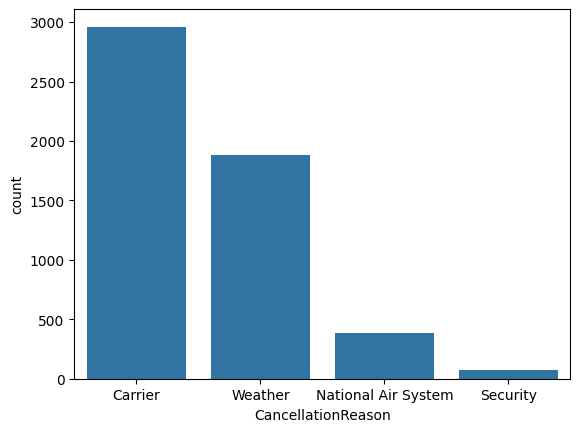

In [10]:
sns.barplot(sfo_df.CancellationReason.value_counts())

In [11]:
#trying to understand the % of flights that were delayed and then also delayed because of bad weather
print(sfo_df.CancellationReason.value_counts(normalize=True))
print(f"\nWeather was the second most prominent reason for cancelling flights around SFO. 35.5% of flights during the period were cancelled due to weather")
print("Carrier related reasons caused the majority of cancelled flights around SFO, accounting for 56 percent of cancellations during the period")

CancellationReason
Carrier                0.558258
Weather                0.355392
National Air System    0.072398
Security               0.013952
Name: proportion, dtype: float64

Weather was the second most prominent reason for cancelling flights around SFO. 35.5% of flights during the period were cancelled due to weather
Carrier related reasons caused the majority of cancelled flights around SFO, accounting for 56 percent of cancellations during the period


In [12]:
#Analysisng  the % of flights delayed
print(sfo_df['Delayed'].value_counts(normalize=True))

Delayed
False    0.651536
True     0.348464
Name: proportion, dtype: float64


In [13]:
#Analyse the distribute of delay lengths in minutes
sfo_delayed = sfo_df[sfo_df.Delayed == True]
sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].head()

,WeatherDelay,CarrierDelay,NASDelay,SecurityDelay,LateAircraftDelay
26,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
60,0.0,0.0,25.0,0.0,0.0
73,NaN,NaN,NaN,NaN,NaN


In [14]:
sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

WeatherDelay          142935.0
CarrierDelay         1772981.0
NASDelay              487358.0
SecurityDelay           3580.0
LateAircraftDelay    1787668.0
dtype: float64

In [17]:
carrier_delayed = sfo_delayed[sfo_delayed['CarrierDelay'] > 0.0]['CarrierDelay']
LateAircraft_delayed = sfo_delayed[sfo_delayed['LateAircraftDelay'] > 0.0]['LateAircraftDelay']
Security_delayed = sfo_delayed[sfo_delayed['SecurityDelay'] > 0.0]['SecurityDelay']
NAS_delayed = sfo_delayed[sfo_delayed['NASDelay'] > 0.0]['NASDelay']
Weather_delayed = sfo_delayed[sfo_delayed['WeatherDelay'] > 0.0]['WeatherDelay']

print(f"The median Carrier Delay was: {np.median(carrier_delayed)}")
print(f"The median Late Aircraft Delay was: {np.median(LateAircraft_delayed)}")
print(f"The median Security Delay was: {np.median(Security_delayed)}")
print(f"The median NAS Delay was: {np.median(NAS_delayed)}")
print(f"the median weather delay was: {np.median(sfo_wd['WeatherDelay'])}")

The median Carrier Delay was: 22.0
The median Late Aircraft Delay was: 38.0
The median Security Delay was: 24.0
The median NAS Delay was: 14.0
the median weather delay was: 41.0


In [18]:
print(f"The mean Carrier Delay was: {np.mean(carrier_delayed)}")
print(f"The mean Late Aircraft Delay was: {np.mean(LateAircraft_delayed)}")
print(f"The mean Security Delay was: {np.mean(Security_delayed)}")
print(f"The mean NAS Delay was: {np.mean(NAS_delayed)}")
print(f"the mean weather delay was: {np.mean(sfo_wd['WeatherDelay'])}")

The mean Carrier Delay was: 46.930331665740226
The mean Late Aircraft Delay was: 61.40445848933466
The mean Security Delay was: 39.77777777777778
The mean NAS Delay was: 24.74275270345738
the mean weather delay was: 90.96122059758423


CarrierDelay        NaN
DepDelayMinutes     NaN
LateAircraftDelay   NaN
NASDelay            NaN
SecurityDelay       NaN
WeatherDelay        NaN
dtype: float64


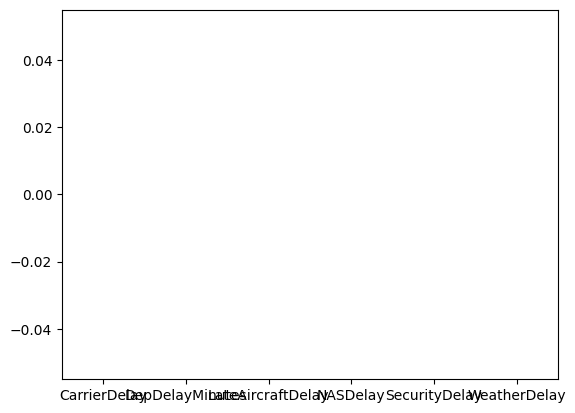

In [20]:
total_delayed_mins = sfo_delayed[['DepDelayMinutes']].sum()
delay_mins_pct = sfo_delayed[['WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum() /  total_delayed_mins
sns.barplot(delay_mins_pct)

print(delay_mins_pct)

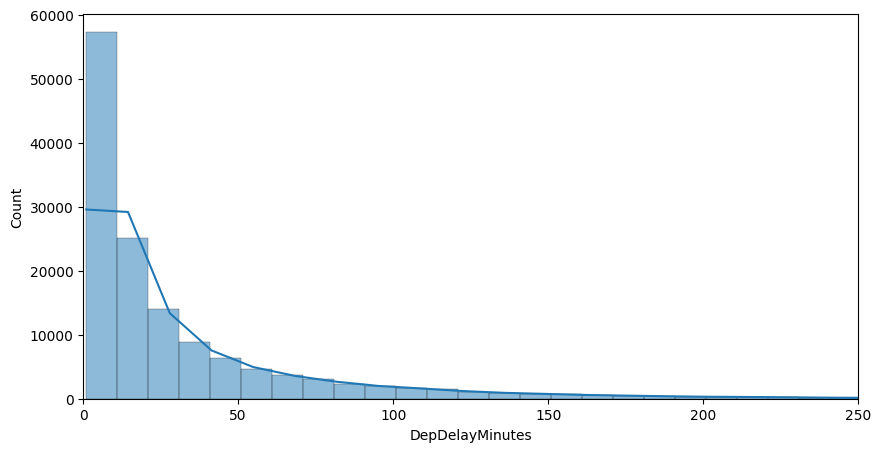

Most flights were only delayed up to 10 minutes


In [21]:
#Distribution of delayed departure length in minutes, each bin has a wdith of 10 minutes of delay.
plt.figure(figsize=(10,5))
sns.histplot(data=sfo_delayed, x='DepDelayMinutes', kde=True, binwidth=10)
plt.xlim(0,250)
#ax.show()
plt.show()
print("Most flights were only delayed up to 10 minutes")

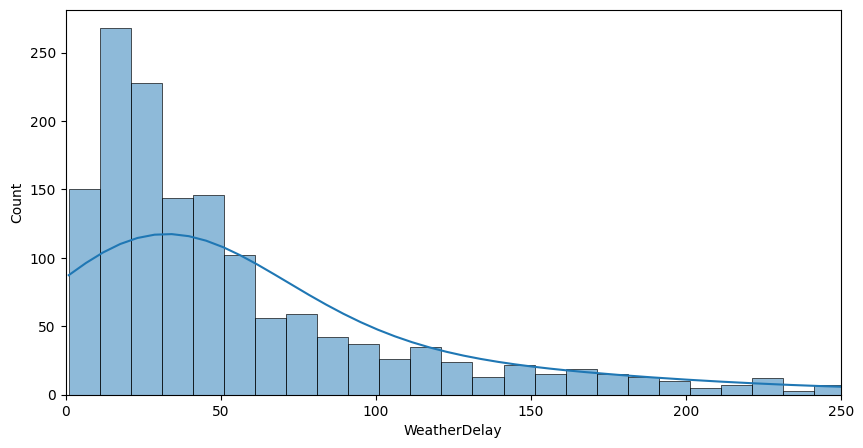

Most flights that were weather delayed were delayed between 10-20 minutes
Circa 25 pct of flights are delayed up to 20 mins
66 pct of flights delayed due to weather were delayed up to 60 minutes with the remaining 3rd being severely delyaed for more than 1 hour
Weather delays are not the most frequent as they only occur circa 3 pct of the time there is a flight delay
However when flights are delayed by weather, they tend to be delayed for longer


NameError: name 'median_delay' is not defined

In [22]:
#Distribution of weather delayed departure length in minutes, each bin has a wdith of 10 minutes of delay.
plt.figure(figsize=(10,5))
sns.histplot(data=sfo_wd, x='WeatherDelay', kde=True, binwidth=10)
plt.xlim(0,250)
#ax.show()
plt.show()
print("Most flights that were weather delayed were delayed between 10-20 minutes")
print("Circa 25 pct of flights are delayed up to 20 mins")
print("66 pct of flights delayed due to weather were delayed up to 60 minutes with the remaining 3rd being severely delyaed for more than 1 hour")

print("Weather delays are not the most frequent as they only occur circa 3 pct of the time there is a flight delay")
print("However when flights are delayed by weather, they tend to be delayed for longer")
print(f"For example: the median weather delay was: {np.median(sfo_wd['WeatherDelay'])} whilst the median overall delay was more than 2x this at: {median_delay}")

In [16]:
#defining the subset df where flights were delayed due to weather conditions
sfo_wd = sfo_df[sfo_df['WeatherDelay'] > 0.0]

sfo_wd = sfo_wd.reset_index().rename(columns={'index':'OriginalDsIndex', 'Temperature':'Temperature_Fahrenheit', 'Time': 'Expected_Time_Of_Departure'})
sfo_wd.head()


,OriginalDsIndex,Expected_Time_Of_Departure,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,...,LateAircraftDelay,Temperature_Fahrenheit,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,153,2021-01-31 06:00:00,SFO,ORD,American Airlines Inc.,False,NaN,True,314.0,0.0,...,0.0,53.0,53.10,1021.67,1021.7,16093.40,0.00,30.38,0.00,0.0
1,199,2021-01-26 09:00:00,SFO,ORD,American Airlines Inc.,False,NaN,True,31.0,0.0,...,0.0,47.0,44.82,1015.24,1015.1,16093.40,4.60,30.38,0.00,0.0
2,207,2021-01-15 14:00:00,SFO,DFW,American Airlines Inc.,False,NaN,True,53.0,0.0,...,0.0,61.0,61.00,1024.38,1024.4,16093.40,8.06,30.38,0.00,0.0
3,212,2021-01-15 12:00:00,SFO,DFW,American Airlines Inc.,False,NaN,True,24.0,0.0,...,0.0,60.0,60.10,1026.08,1026.1,14484.06,3.45,30.38,0.00,0.0
4,1061,2021-01-04 14:00:00,SFO,ATL,Delta Air Lines Inc.,False,NaN,True,33.0,0.0,...,0.0,60.0,60.10,1019.30,1019.4,16093.40,19.56,30.38,0.76,0.0


In [23]:
sfo_delayed_num_only = sfo_delayed.select_dtypes(include='number')
print(sfo_delayed_num_only.info())


<class 'pandas.core.frame.DataFrame'>
Index: 139017 entries, 26 to 398938
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DepDelayMinutes         139017 non-null  float64
 1   CarrierDelay            60282 non-null   float64
 2   WeatherDelay            60282 non-null   float64
 3   NASDelay                60282 non-null   float64
 4   SecurityDelay           60282 non-null   float64
 5   LateAircraftDelay       60282 non-null   float64
 6   Temperature             139017 non-null  float64
 7   Feels_Like_Temperature  139017 non-null  float64
 8   Altimeter_Pressure      139017 non-null  float64
 9   Sea_Level_Pressure      139017 non-null  float64
 10  Visibility              139017 non-null  float64
 11  Wind_Speed              139017 non-null  float64
 12  Wind_Gust               139017 non-null  float64
 13  Precipitation           139017 non-null  float64
 14  Ice_Accretion_3hr       

In [24]:
sfo_delayed_num_only.head()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
26,5.0,NaN,NaN,NaN,NaN,NaN,50.0,50.0,1005.42,1016.6,16093.40,12.66,30.38,0.0,0.0
27,5.0,NaN,NaN,NaN,NaN,NaN,50.0,50.0,1005.42,1005.4,16093.40,11.51,30.38,0.0,0.0
35,4.0,NaN,NaN,NaN,NaN,NaN,52.0,52.0,1022.69,1022.7,11265.38,3.45,30.38,0.0,0.0
60,35.0,0.0,0.0,25.0,0.0,0.0,56.0,55.9,1015.24,1015.2,16093.40,6.90,30.38,0.0,0.0
73,8.0,NaN,NaN,NaN,NaN,NaN,50.0,50.0,1024.38,1024.2,16093.40,4.60,30.38,0.0,0.0


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [26]:

zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)
sfo_delayed_imputed = zero_imputer.fit_transform(sfo_delayed_num_only)

sfo_delayed_num = pd.DataFrame(sfo_delayed_imputed , columns=sfo_delayed_num_only.columns)
sfo_delayed_num.head()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,5.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,1005.42,1016.6,16093.40,12.66,30.38,0.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,1005.42,1005.4,16093.40,11.51,30.38,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,52.0,52.0,1022.69,1022.7,11265.38,3.45,30.38,0.0,0.0
3,35.0,0.0,0.0,25.0,0.0,0.0,56.0,55.9,1015.24,1015.2,16093.40,6.90,30.38,0.0,0.0
4,8.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,1024.38,1024.2,16093.40,4.60,30.38,0.0,0.0


In [27]:
rscaler = RobustScaler()

scaled_data = rscaler.fit_transform(sfo_delayed_num)
scaled_weather_data = rscaler.fit_transform(sfo_delayed_num[sfo_delayed_num.WeatherDelay > 0.0])

sfo_delayed_num_scaled = pd.DataFrame(scaled_data, columns=sfo_delayed_num.columns)
sfo_delayed_num_scaled_weather = pd.DataFrame(scaled_weather_data, columns=sfo_delayed_num.columns)

sfo_delayed_num_scaled_weather

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,3.185185,0.0,3.724638,0.0,0.0,0.0,-0.5,-0.484848,0.832718,0.910714,0.000000,-0.916727,0.0,0.000000,0.0
1,-0.308642,0.0,-0.202899,0.0,0.0,0.0,-1.1,-1.321212,0.041820,-0.267857,0.000000,-0.583635,0.0,0.000000,0.0
2,-0.037037,0.0,0.057971,0.0,0.0,0.0,0.3,0.313131,1.166052,1.392857,0.000000,-0.333092,0.0,0.000000,0.0
3,-0.395062,0.0,-0.362319,0.0,0.0,0.0,0.2,0.222222,1.375154,1.696429,-0.333333,-0.666908,0.0,0.000000,0.0
4,-0.283951,0.0,-0.202899,0.0,0.0,0.0,0.2,0.222222,0.541205,0.500000,0.000000,0.499638,0.0,25.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,-0.456790,0.0,-0.289855,0.0,0.0,0.0,0.9,0.919192,0.125461,-0.142857,0.000000,-0.333092,0.0,0.000000,0.0
1565,0.061728,0.0,0.101449,0.0,0.0,0.0,0.9,0.919192,-0.041820,-0.392857,0.000000,-0.666908,0.0,0.000000,0.0
1566,0.777778,0.0,1.115942,0.0,0.0,0.0,1.5,1.525253,0.207872,0.000000,0.000000,0.416365,0.0,0.000000,0.0
1567,-0.123457,0.0,-0.202899,0.0,0.0,0.0,0.1,0.111111,0.000000,-0.303571,0.000000,-0.166546,0.0,0.000000,0.0


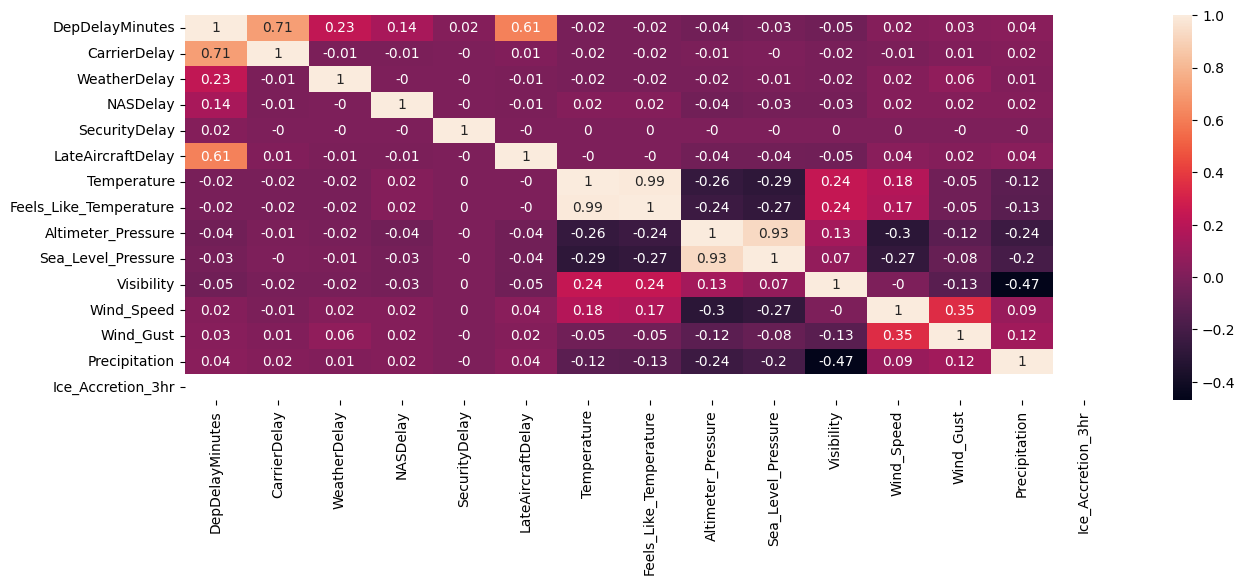

In [28]:
sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled.corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

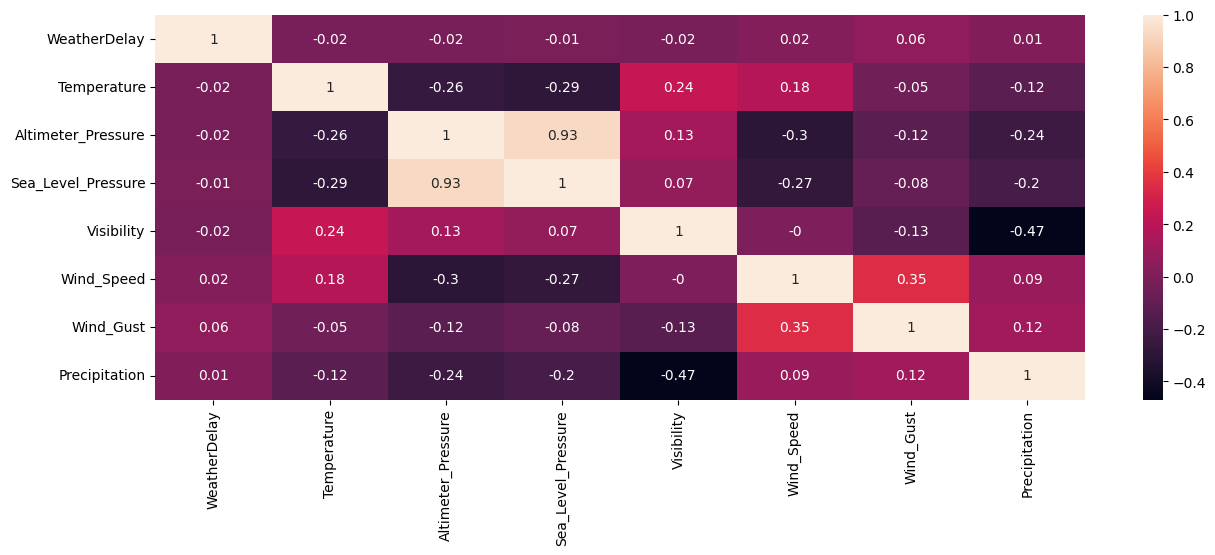

In [29]:
sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled[['WeatherDelay', 'Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure', 'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation']].corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

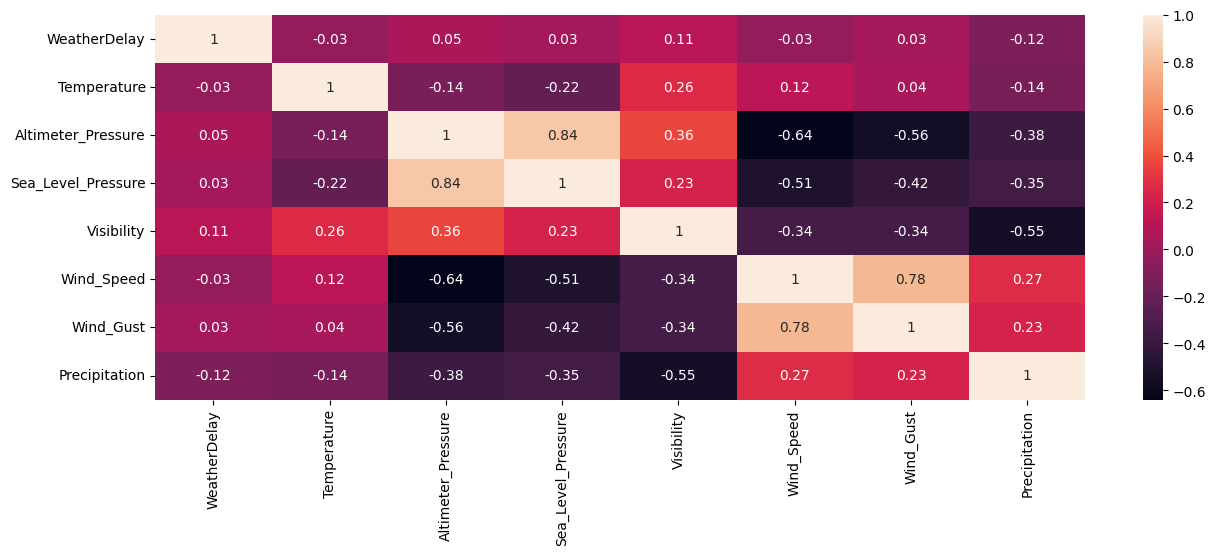

In [30]:


sfo_delayed_num_scaled_corr_df = round(sfo_delayed_num_scaled_weather[['WeatherDelay', 'Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure', 'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation']].corr(),2)
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_scaled_corr_df, annot=True)
plt.show()

In [31]:
round(sfo_delayed_num_only.describe())

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,139017.0,60282.0,60282.0,60282.0,60282.0,60282.0,139017.0,139017.0,139017.0,139017.0,139017.0,139017.0,139017.0,139017.0,139017.0
mean,36.0,29.0,2.0,8.0,0.0,30.0,60.0,59.0,1016.0,1016.0,15012.0,12.0,30.0,0.0,0.0
std,74.0,77.0,28.0,24.0,3.0,64.0,7.0,8.0,5.0,5.0,3116.0,8.0,3.0,1.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,36.0,32.0,985.0,985.0,402.0,0.0,16.0,0.0,0.0
25%,5.0,0.0,0.0,0.0,0.0,0.0,54.0,54.0,1013.0,1013.0,16093.0,6.0,30.0,0.0,0.0
50%,15.0,9.0,0.0,0.0,0.0,0.0,59.0,59.0,1016.0,1016.0,16093.0,12.0,30.0,0.0,0.0
75%,39.0,29.0,0.0,6.0,0.0,37.0,65.0,65.0,1019.0,1019.0,16093.0,17.0,30.0,0.0,0.0
max,2681.0,2036.0,1103.0,1049.0,371.0,2246.0,98.0,94.0,1032.0,1032.0,16093.0,282.0,74.0,19.0,0.0


In [32]:
median_delay = np.median(sfo_delayed_num_only['DepDelayMinutes'])
print(f"The median delay was {median_delay} minutes")

The median delay was 15.0 minutes


In [33]:

sfo_delayed_num_only_corr = round(sfo_delayed_num_only.corr(),2)
sfo_delayed_num_only_corr


,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
DepDelayMinutes,1.00,0.70,0.23,0.04,0.01,0.56,-0.02,-0.02,-0.04,-0.03,-0.05,0.02,0.03,0.04,NaN
CarrierDelay,0.70,1.00,-0.03,-0.09,-0.01,-0.08,-0.03,-0.03,0.02,0.02,0.00,-0.04,-0.00,0.00,NaN
WeatherDelay,0.23,-0.03,1.00,-0.02,-0.00,-0.03,-0.03,-0.02,-0.02,-0.01,-0.02,0.02,0.07,0.01,NaN
NASDelay,0.04,-0.09,-0.02,1.00,-0.01,-0.10,0.03,0.03,-0.03,-0.02,-0.02,0.01,0.02,0.01,NaN
SecurityDelay,0.01,-0.01,-0.00,-0.01,1.00,-0.01,0.00,0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,NaN
LateAircraftDelay,0.56,-0.08,-0.03,-0.10,-0.01,1.00,-0.00,-0.01,-0.03,-0.03,-0.03,0.04,0.01,0.02,NaN
Temperature,-0.02,-0.03,-0.03,0.03,0.00,-0.00,1.00,0.99,-0.26,-0.29,0.24,0.18,-0.05,-0.12,NaN
Feels_Like_Temperature,-0.02,-0.03,-0.02,0.03,0.00,-0.01,0.99,1.00,-0.24,-0.27,0.24,0.17,-0.05,-0.13,NaN
Altimeter_Pressure,-0.04,0.02,-0.02,-0.03,0.00,-0.03,-0.26,-0.24,1.00,0.93,0.13,-0.30,-0.12,-0.24,NaN
Sea_Level_Pressure,-0.03,0.02,-0.01,-0.02,-0.00,-0.03,-0.29,-0.27,0.93,1.00,0.07,-0.27,-0.08,-0.20,NaN


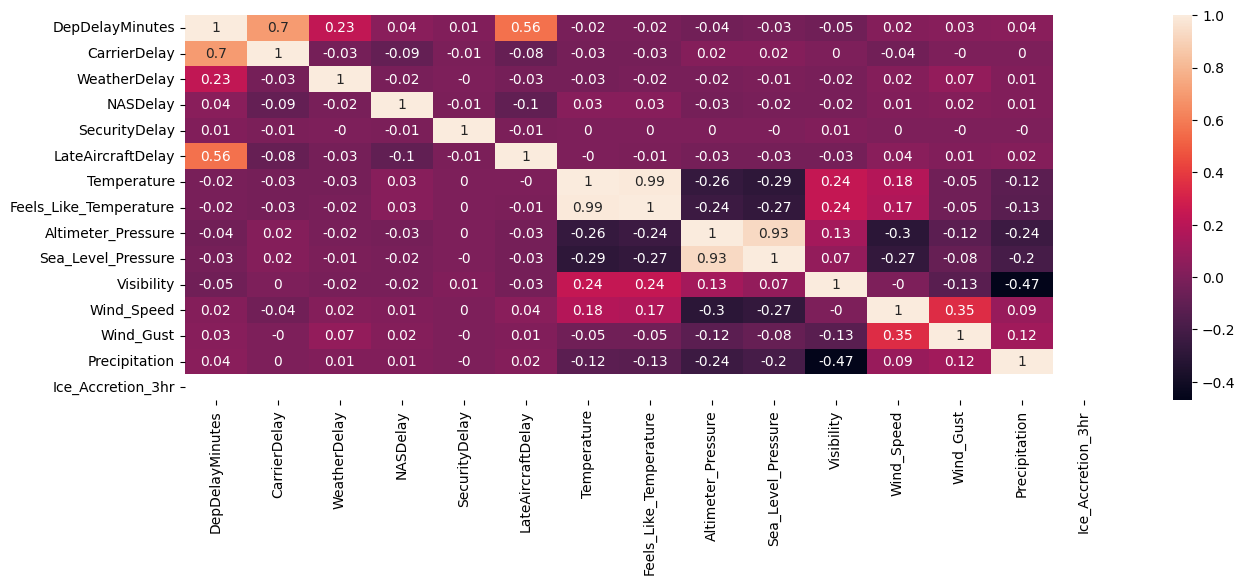

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(sfo_delayed_num_only_corr, annot=True)
plt.show()

In [35]:
num_of_weather_delays = sfo_wd['WeatherDelay'].count()

print(f"{num_of_weather_delays} flights were delayed due to weather")

1573 flights were delayed due to weather


Airline Delay and Cancellation Data, 2009 - 2018

This is a very comprehensive list of delay and cancellation data for 9 years but it doesn't contain any weather data

Data is split by year with a csv for each

Airline Delays - good for 2019 and 2020 delay and cancellation reasons, no detailed weather variables

In [36]:
import os

In [ ]:
#using pandas concatenate to build a master df
'''notebooks_dir = os.path.dirname(__file__)
lateguru_dir = os.path.dirname(notebooks_dir)
dataset_b_dir = os.path.join(lateguru_dir, "raw_data", "Dataset_B_FORWW_Kaggle")'''

dataset_b_dir = '../raw_data/Dataset_B_FORWW_Kaggle'

file_names = os.listdir(dataset_b_dir)

print(file_names)

master_df = pd.read_csv(os.path.join(dataset_b_dir, file_names[0]))

#print(master_df)


for file in file_names:
    df = pd.read_csv(os.path.join(dataset_b_dir,file), low_memory=False)
    master_df = pd.concat([master_df,df], ignore_index=True)


master_df.info()


['LAX.csv', 'MDW.csv', 'DTW.csv', 'BWI.csv', 'MIA.csv', 'SAN.csv', 'TPA.csv', 'DFW.csv', 'SEA.csv', 'AUS.csv', 'IAH.csv', 'SFO.csv', 'DEN.csv', 'CLT.csv', 'JFK.csv', 'MCO.csv', 'LGA.csv', 'EWR.csv', 'ATL.csv', 'IAD.csv', 'ORD.csv', 'PHX.csv', 'LAS.csv', 'PHL.csv', 'BNA.csv', 'DCA.csv', 'SLC.csv', 'FLL.csv', 'BOS.csv', 'MSP.csv']


/var/folders/8b/0kc0p26s4lq_bndd5xrhdlhw0000gn/T/ipykernel_7483/2944840533.py:18: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dataset_b_dir,file))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [44]:
dataset_b_dir = '../raw_data/Dataset_B_FORWW_Kaggle'

file_names = os.listdir(dataset_b_dir)

#type(file_names)
top_5_airports = []

for file in file_names:
    if file == 'ATL.csv':
        top_5_airports.append(file)
    elif file == 'DFW.csv':
        top_5_airports.append(file)
    elif file == 'DEN.csv':
        top_5_airports.append(file)
    elif file == 'LAX.csv':
        top_5_airports.append(file)
    elif file == 'ORD.csv':
        top_5_airports.append(file)

top_5_airports


['LAX.csv', 'DFW.csv', 'DEN.csv', 'ATL.csv', 'ORD.csv']

In [48]:
lax_df = pd.read_csv(os.path.join(dataset_b_dir,top_5_airports[0]))
dfw_df = pd.read_csv(os.path.join(dataset_b_dir,top_5_airports[1]))
den_df = pd.read_csv(os.path.join(dataset_b_dir,top_5_airports[2]))
atl_df = pd.read_csv(os.path.join(dataset_b_dir,top_5_airports[3]))
ord_df = pd.read_csv(os.path.join(dataset_b_dir,top_5_airports[4]))


In [49]:
top_5_airports_df = pd.concat([lax_df,dfw_df, den_df, atl_df, ord_df], ignore_index=True)

In [51]:
top_5_airports_df['Origin'].value_counts()

Origin
ATL    1130743
DEN     959826
DFW     946119
ORD     931676
LAX     650471
Name: count, dtype: int64

In [52]:
top_5_airports_output_csv = 'Top_5_Airports.csv'
top_5_airports_output_path = os.path.join(dataset_b_dir, top_5_airports_output_csv)

top_5_airports_df.to_csv(top_5_airports_output_path, header=True, index=False)


In [173]:
output_csv = 'All_Airports.csv'

output_path = os.path.join(dataset_b_dir, output_csv)

master_df.to_csv(output_path, header=True, index=False, compression='zip')


In [171]:
all_airports_df = pd.read_csv(os.path.join(dataset_b_dir, output_csv))
all_airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [172]:
all_airports_df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,2.0,NaN,NaN,...,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0
